# Sentiment & Wordcloud Analysis.
### Using Bag of Words Model.

## Data:-  Twitter Data. <br> Topic:- Corona Virus.

***
***

# Library.

In [1]:
# Installing the library to fetch Tweets
#!pip install tweepy

In [2]:
import tweepy
import pandas as pd

# Data Import & Preprocessing.

In [3]:
# Variables for user credentials to access Twitter API
access_token = "1399819700457017345-K9Hhc0tfURvgRd4NNhQvej7YW3ReSs"
access_token_secret = "hUl3ANuYhrgJxYNwT2ML5weSsDC7oOEPEqYpKYOcpz0w3"
consumer_key = "qpLmZbupMFUV0qJyYdWOjoJNG"
consumer_secret = "0ltT1eyYKTxFcQJgma945JrJKJYJgQiEV8WjnQUg2GRaWY2yeO"

In [4]:
# Connecting to twitter using credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about the given keyword in all the latest tweets & pull the data
tweets_data=api.search('corona virus',count=100, lang='en', include_rts=False, tweet_mode="extended",
                      geocode="22.5726,88.3639,1000km")
print ("Total number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Extracting the tweet metadata
for status in tweets_data:
    tweets=tweets.append(status._json, ignore_index=True)

Total number of tweets found: 100


In [5]:
# Looking at the data
tweets.head(2)

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,...,retweeted,retweeted_status,source,truncated,user,extended_entities,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str
0,None,None,Wed Jun 30 10:02:24 +0000 2021,"[0, 140]","{'hashtags': [{'text': 'RestoreOldPension', 'i...",0.0,0.0,RT @NmopsInd: Privatisation is a bigger Virus ...,None,1.410177e+18,...,0.0,{'created_at': 'Sat Jun 26 10:45:03 +0000 2021...,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1410104211728072706, 'id_str': '1410104...",NaN,NaN,NaN,NaN,NaN
1,None,None,Wed Jun 30 09:56:14 +0000 2021,"[0, 272]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,Due to Covid-19 pandemic as social interaction...,None,1.410175e+18,...,0.0,NaN,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1300590801056006144, 'id_str': '1300590...",NaN,NaN,NaN,NaN,NaN


In [6]:
tweets_data= pd.DataFrame(tweets['full_text'])
tweets_data.head(3)

,full_text
0,RT @NmopsInd: Privatisation is a bigger Virus ...
1,Due to Covid-19 pandemic as social interaction...
2,RT @vrsrivastva: According to govt only coachi...


In [7]:
# Looking at the tweets of few rows.
# Converting the text column as a single.
Tweets_String= str(tweets_data.loc[20:35,'full_text'].values)
Tweets_String

'[\'What Rahul Gandhi Said\\n\\nThe Corona Virus is an extremely serious threat to our people and our economy. My sense is the government is not taking this threat seriously. Timely action is critical. \\n@LambaAlka\\n@NayakRagini\\n#Rahul_THE_Leader https://t.co/OSusnfrTap\\n#हुल_दिवस\'\n \'WB: Administration orders closure of weekly market in Howrah to control\\xa0Corona https://t.co/gQr2ipCHbU\'\n \'Compensation will be given for death due to Corona, Supreme Court said – NDMA should decide the\\xa0amount https://t.co/343VcuDX1x\'\n "RT @SV9099: @jntuhupdate @KTRTRS @RaoKavitha @TelanganaCMO plz we r students. We have life\'s. We will be effected by corona so #canceljntuh…"\n \'Wuhan lab researcher linked to military scientists\\nIf this is true, then Corona virus was indeed a bio-weapon\\nThere should be a thorough investigation in this regard\\nhttps://t.co/FlnVRS44CK\'\n "@kae_lfc @Konfytbekkie @miraaikie You do know that the Corona virus has been around that long don\'t you? It h

### There are lot junk in the Data. Like:- Twitter-Handles, Smileys, 'RT' etc..

In [8]:
# Creating a function to clean the data

def Data_Cleaner(Input_Data):

    # Tweet Text cleaning
    import re

    # Removing the twitter usernames from tweet string
    Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Input_Data)

    # Removing the URLS from the tweet string
    Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)

    # removing all the special characters
    #Tweet_Texts_Cleaned = re.sub(r'[?|$|.|!|:|RT]',r' ',Tweet_Texts_Cleaned)

    # Removing everything which is not alphabets.
    Tweet_Texts_Cleaned= re.sub(r'[^a-z A-Z]',r'',Tweet_Texts_Cleaned)

    # Removing 'RT' from tweet string
    Tweet_Texts_Cleaned= re.sub(r'[RT]',r' ',Tweet_Texts_Cleaned)

    # Removing extra spaces in the text
    Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

    return(Tweet_Texts_Cleaned)

In [9]:
# Calling the Function & Cleaning the data.
tweets_data['Tweets']= tweets_data['full_text'].apply(Data_Cleaner)
tweets_data.head(3)
#str(tweets_data['Tweets'].values)

,full_text,Tweets
0,RT @NmopsInd: Privatisation is a bigger Virus ...,Privatisation is a bigger Virus than Corona e...
1,Due to Covid-19 pandemic as social interaction...,Due to Covid pandemic as social interaction an...
2,RT @vrsrivastva: According to govt only coachi...,According to govt only coaching centers and s...


In [10]:
tweets_data.loc[1,'Tweets']

'Due to Covid pandemic as social interaction and physically presence is avoided to stop the spread of CO ONA Virus In Gbss Ambika Vihar Hos and Mentor teacher guided again the school staff about digital platform o provide online teaching classes '

# Sentiment Analysis & Visualization (B.O.W model).

In [11]:
# Import sentiment words.
Positive_Words= pd.read_table('C:\\Users\\Pranab_Kumar_Paul\\Desktop\\Python_Script\\My_Script\\Python_Project(GitHub)\\UnSupervised__(Text_Data)\\Sentiment_Analysis_Data\\Positive_words.txt', encoding= 'latin-1')

Negative_Words= pd.read_table('C:\\Users\\Pranab_Kumar_Paul\\Desktop\\Python_Script\\My_Script\\Python_Project(GitHub)\\UnSupervised__(Text_Data)\\Sentiment_Analysis_Data\\Negative_words.txt', encoding= 'latin-1')

In [12]:
## Sample positive words.
Positive_Words.head()

,PositiveWords
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [13]:
## Sample negative words.
Negative_Words.head()

,NegativeWords
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [14]:
# Function for Sentiment analysis using B.O.W model.
def BOW_Sentiment(inpSentence):
    
    Positive_Score= 0
    Negative_Score= 0
    Overall_Sentiment= ''
    
    # Converting every word in lowercase.
    new_sentence= inpSentence.lower()
    
    # Splitting the sentence into list of words.
    word_list= new_sentence.split()
    
    # Iterate every word and check if it is present in the positive or negative word list.
    for word in word_list:
        if (word in Negative_Words.values):
            Negative_Score+=1            
        if (word in Positive_Words.values):
            Positive_Score+=1
    
    # Checking the sentiment.
    if ((Positive_Score - Negative_Score) > 0):
        Overall_Sentiment= 'Positive'

    elif ((Positive_Score - Negative_Score) == 0):
        Overall_Sentiment= 'Neutral'

    else:
        Overall_Sentiment= 'Negative'

    return(Overall_Sentiment)

In [15]:
## Applying the function.
tweets_data['Sentiment']=tweets_data['Tweets'].apply(BOW_Sentiment)

In [16]:
## Sample sentiment.
tweets_data.head(3)

,full_text,Tweets,Sentiment
0,RT @NmopsInd: Privatisation is a bigger Virus ...,Privatisation is a bigger Virus than Corona e...,Negative
1,Due to Covid-19 pandemic as social interaction...,Due to Covid pandemic as social interaction an...,Negative
2,RT @vrsrivastva: According to govt only coachi...,According to govt only coaching centers and s...,Negative


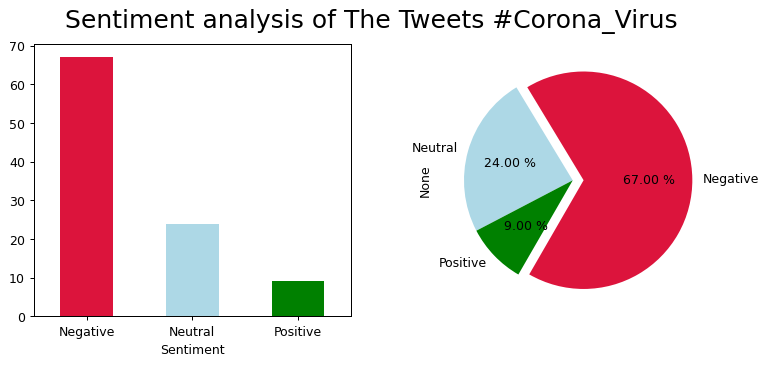

In [17]:
# Visualizing the overall sentiment distribution

import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4),dpi= 90)
fig.suptitle("Sentiment analysis of The Tweets #Corona_Virus",fontsize= 20)

# Grouping the data
#GroupedData=tweets_data['Sentiment'].value_counts()
GroupedData=tweets_data.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson','lightblue', 'green'],rot= 0)
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson','lightblue', 'green'], autopct= '%.2f %%',
                         startangle = 240, explode = (0.1,0.0,0.0))    
plt.show()

# Wordcloud Analysis of the Negative Tweets

In [18]:
#tweets_data[['Tweets','Sentiment']][tweets_data['Sentiment']=='Negative']

Negative_Sentiment= str(tweets_data['Tweets'][tweets_data['Sentiment']=='Negative'].values)
Negative_Sentiment

"[' Privatisation is a bigger Virus than Corona estoreOldPension PrivatizationNoSolution '\n 'Due to Covid pandemic as social interaction and physically presence is avoided to stop the spread of CO ONA Virus In Gbss Ambika Vihar Hos and Mentor teacher guided again the school staff about digital platform o provide online teaching classes '\n ' According to govt only coaching centers and students are responsible for spreading corona virus Everything has been opene'\n ' My father needs your help in raising funds for his treatment of Mucormycosishe has undergone endoscopy and has lost th'\n ' he government did not increase the salaries and pensions of government employees last year due to the Corona virus crisis and the resulting negative trend in the economy'\n ' My father needs your help in raising funds for his treatment of Mucormycosishe has undergone endoscopy and has lost th'\n ' espected FM mam you have announced in budget that you will resolution all NPA stressed assets in this cor

In [19]:
# Finding the important word combinations using textblob
from textblob import TextBlob

# Converting the sample text to a blob
SampleTextInBlobFormat = TextBlob(Negative_Sentiment)

# Finding the noun phrases (important keywords combination) in the text, to understand what entities are being talked about
NounPhrases=SampleTextInBlobFormat.noun_phrases

# Creating an empty list to hold new values
# combining the noun phrases using underscore to visualize it as wordcloud
NewNounList=[]
for words in NounPhrases:
    NewNounList.append(words.replace(" ", "_"))
    
# Splitting the text to make list of words
#WordList=str(NewNounList).split()    

In [20]:
# Looking at the Few noun_phrases
NewNounList[1:6]

['virus', 'corona', 'privatizationnosolution', 'covid', 'social_interaction']

In [21]:
# Finding out the frequency of Top 10 words in text

# Creating a Dataframe
WordData=pd.DataFrame(data= pd.Series(NewNounList), columns=['words'])

# Finding the top frequency words
print(WordData.groupby('words').size().nlargest(15))


words
corona                     29
china                      13
india                      13
main_target                11
usa                        11
corona_virus                9
virus                       9
privatisation               4
privatizationnosolution     4
wuhan                       4
corona_virus_tries          3
covidpneumonia              3
database_e'                 3
father_needs                3
generic_sequence            3
dtype: int64


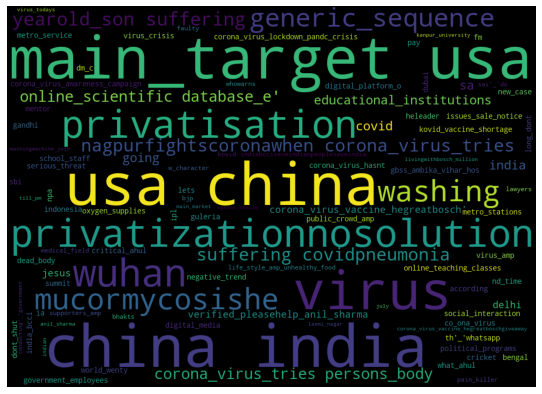

In [22]:
# Converting list into a string to plot wordcloud
NewNounString=' '.join(NewNounList)
#print('##### Important word combinations ####')
#print(NewNounString)

########################################################################
# Plotting the wordcloud
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
customStopwords=list(STOPWORDS) + ['corona_virus','corona','father_needs']

wordcloudimage = WordCloud( max_words=100,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720
                          ).generate(NewNounString)

plt.figure(figsize=(15,7))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()